Appunti 13 novembre
==========
La funziona map applica una funzione vettoriale ai vertici dell'intervallo dom.  
MAP([x,y])(dom)  
$$ x = R \cdot \cos(u) \\ y = R \cdot \sin(u) $$ 
x = lambda p: r*cos(p[0])
y = lambda p: r*sin(p[0])

In [2]:
from larlib import *

Evaluating fenvs.py..
...fenvs.py imported in 0.010595 seconds


In [3]:
x = lambda p: cos(p[0])
y = lambda p: sin(p[0])
# INTERVALS(range)(number of segments)
dom = INTERVALS(2*PI)(32)

In [4]:
VIEW(MAP([x,y])(dom))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173c212480> >

In [5]:
dom2 = T(1)(PI/4)(INTERVALS(PI/2)(32))
VIEW(MAP([x,y])(dom2))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173c2129f0> >

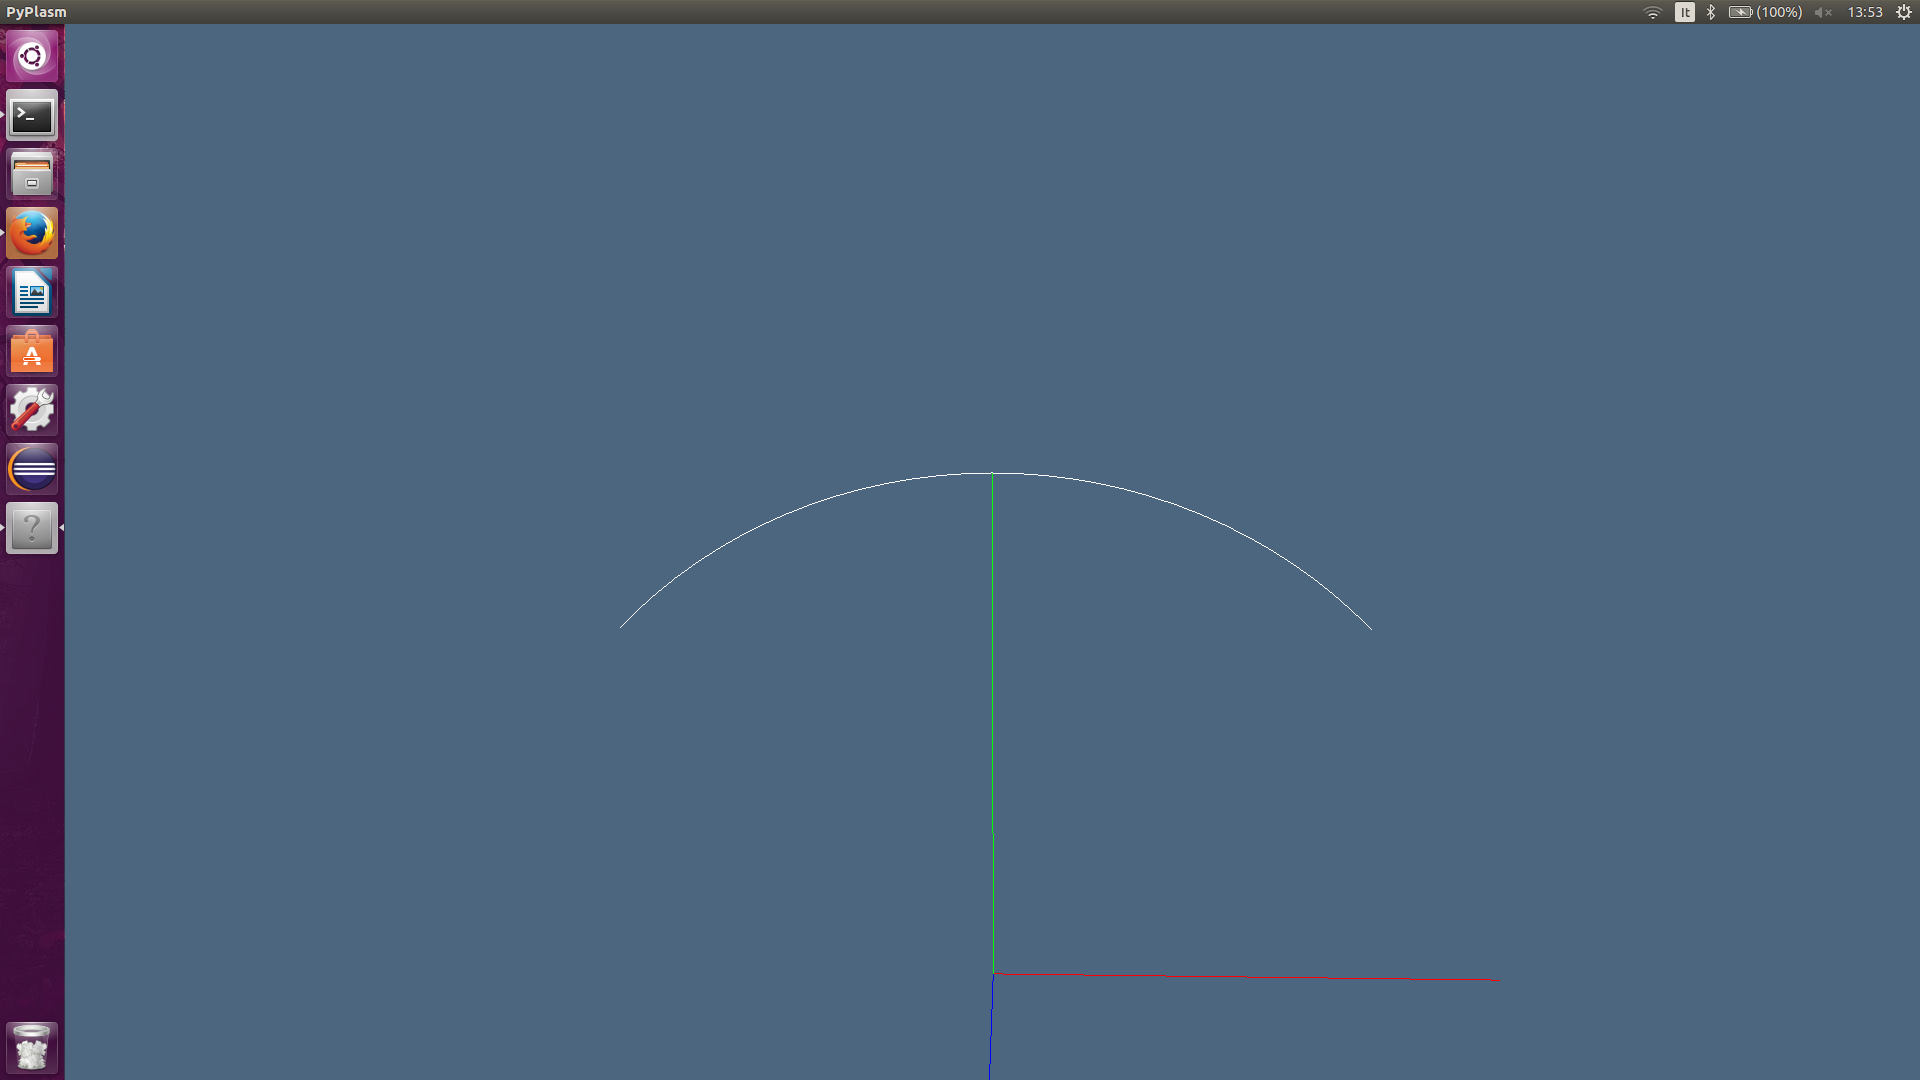

Se voglio generare una corona/anello adesso la mia funziona varia in base a u (l'angolo) e v (il raggio)
$$ x = v \cdot \cos(u) \\ y = v \cdot \sin(u) $$ 

In [12]:
x = lambda p: p[1]*cos(p[0])
# o anche:   x = lambda (u,v): v*cos(u)
y = lambda p: p[1]*sin(p[0])
dom = T(2)(.5)(PROD([INTERVALS(2*PI)(32), INTERVALS(.5)(32)]))

In [13]:
VIEW(MAP([x,y])(dom))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173b1242d0> >

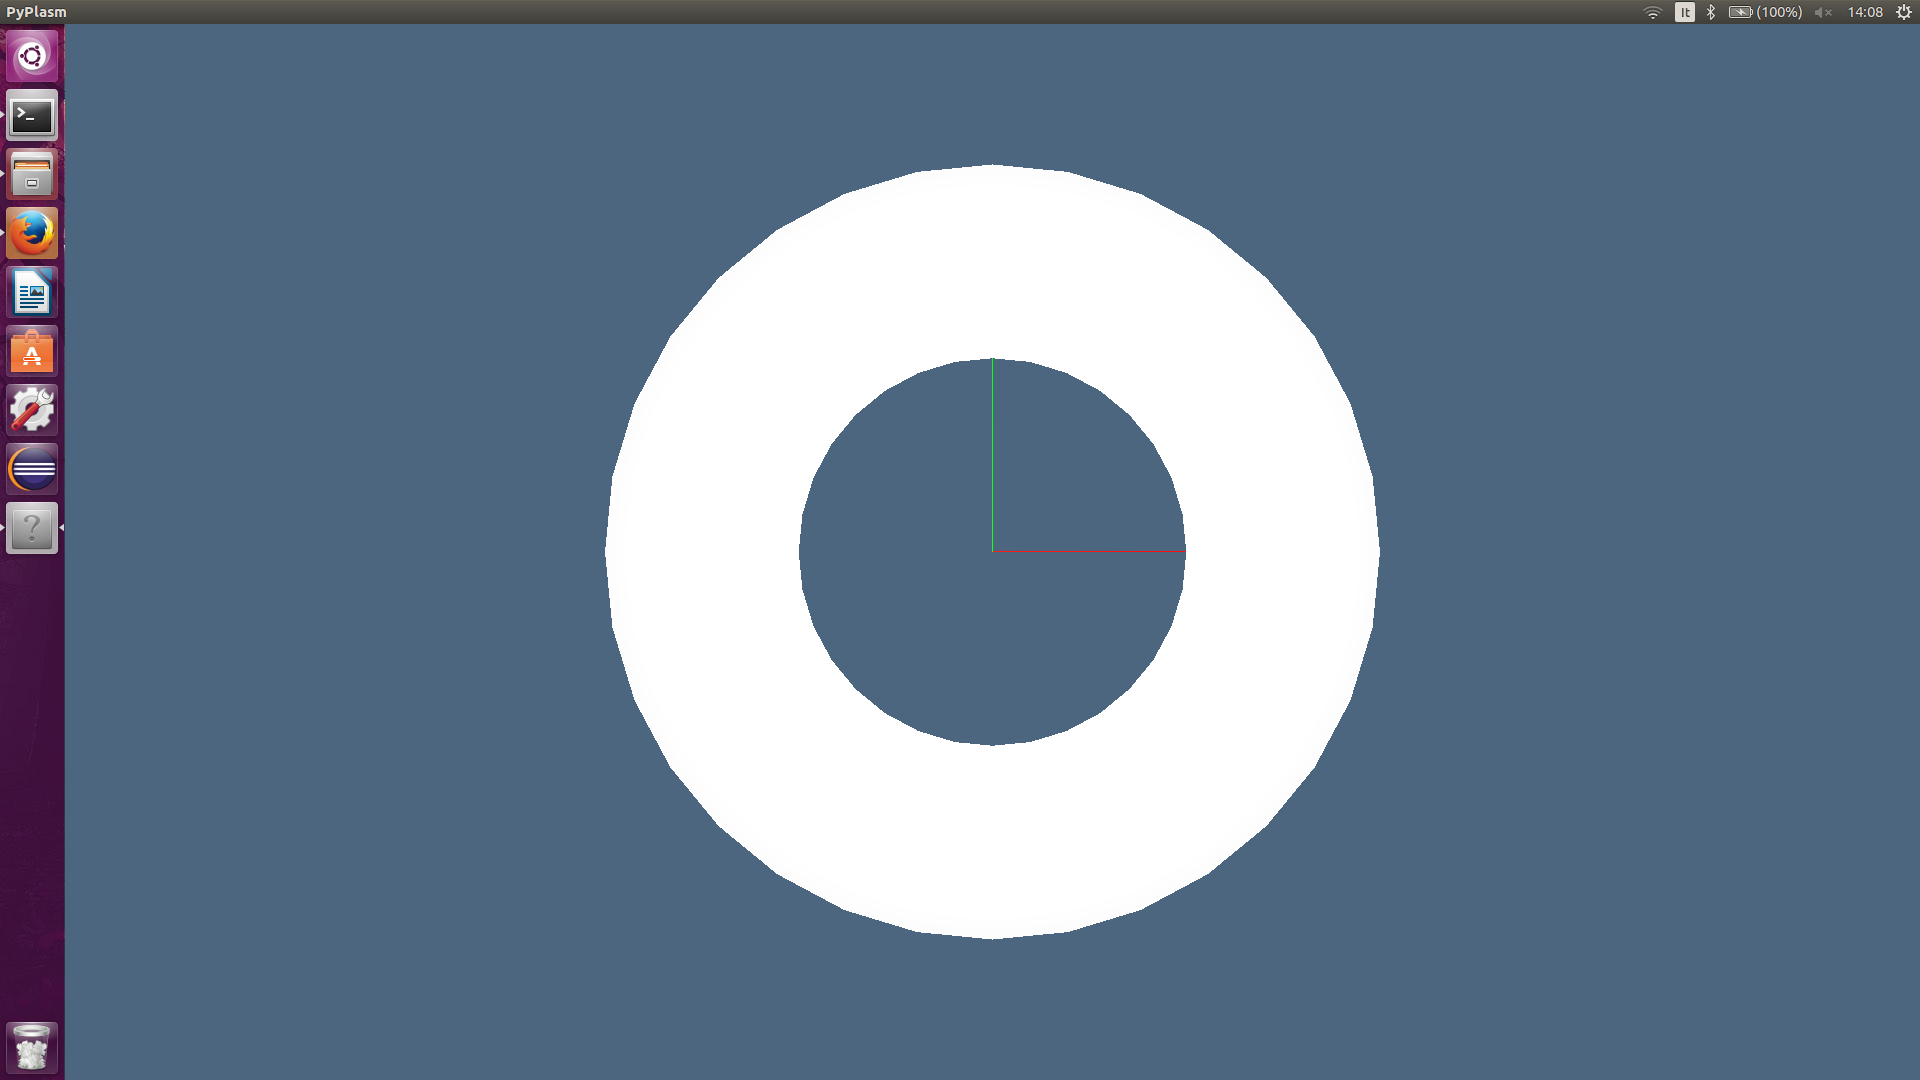

In [14]:
def ring(args):
    R1, R2 = args
    x = lambda (u,v): v*cos(u)
    y = lambda (u,v): v*sin(u)
    dom = T(2)(R1)(PROD([INTERVALS(2*PI)(32), INTERVALS(R2-R1)(32)]))
    return MAP([x,y])(dom)

In [17]:
VIEW(ring([2,3]))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173b124360> >

In [18]:
bz=BEZIER(S1)([[0,0],[1,0],[0,1],[0,0]])
VIEW(MAP(bz)(INTERVALS(1)(32)))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173b124b70> >

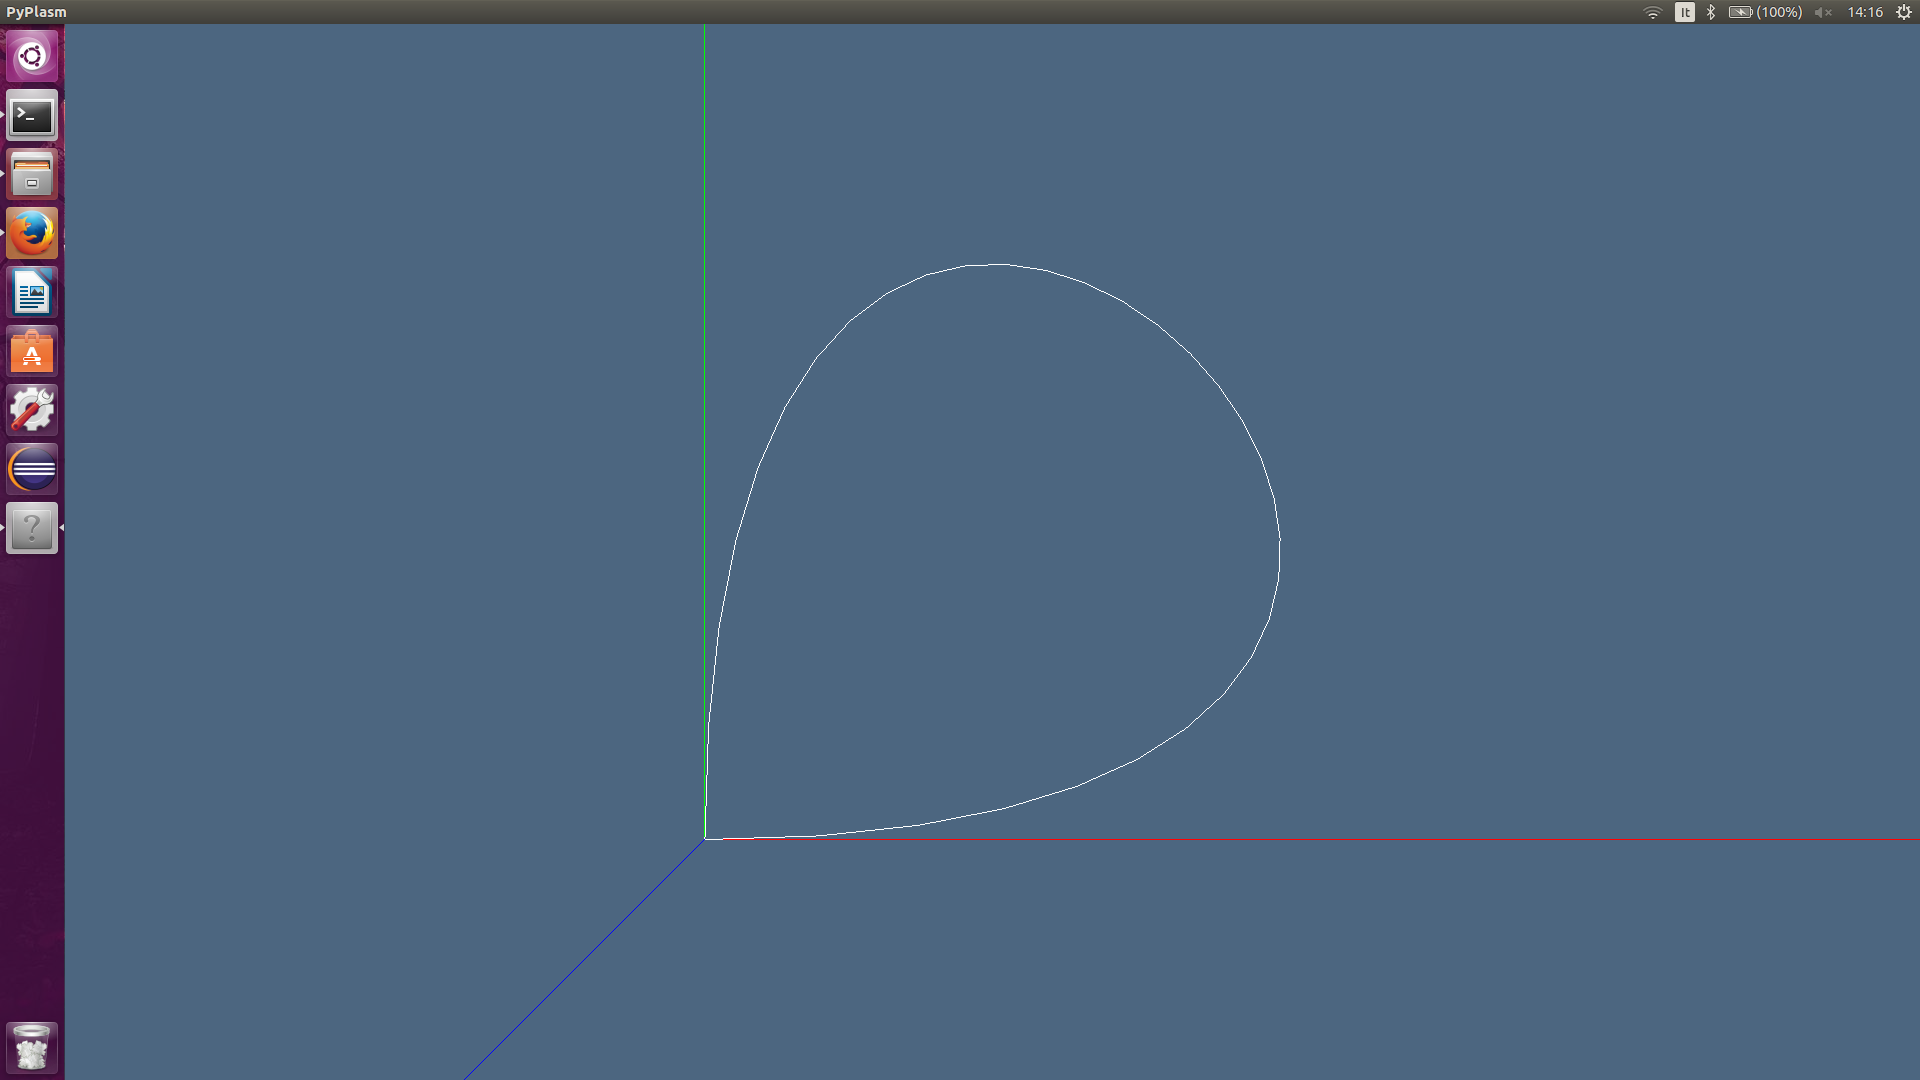

In [19]:
# Aggiungo un nuovo punto [0,0] in mezzo alla sequenza
bz2=BEZIER(S1)([[0,0],[1,0],[0,0],[0,1],[0,0]])
VIEW(MAP(bz2)(INTERVALS(1)(32)))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173b124bd0> >

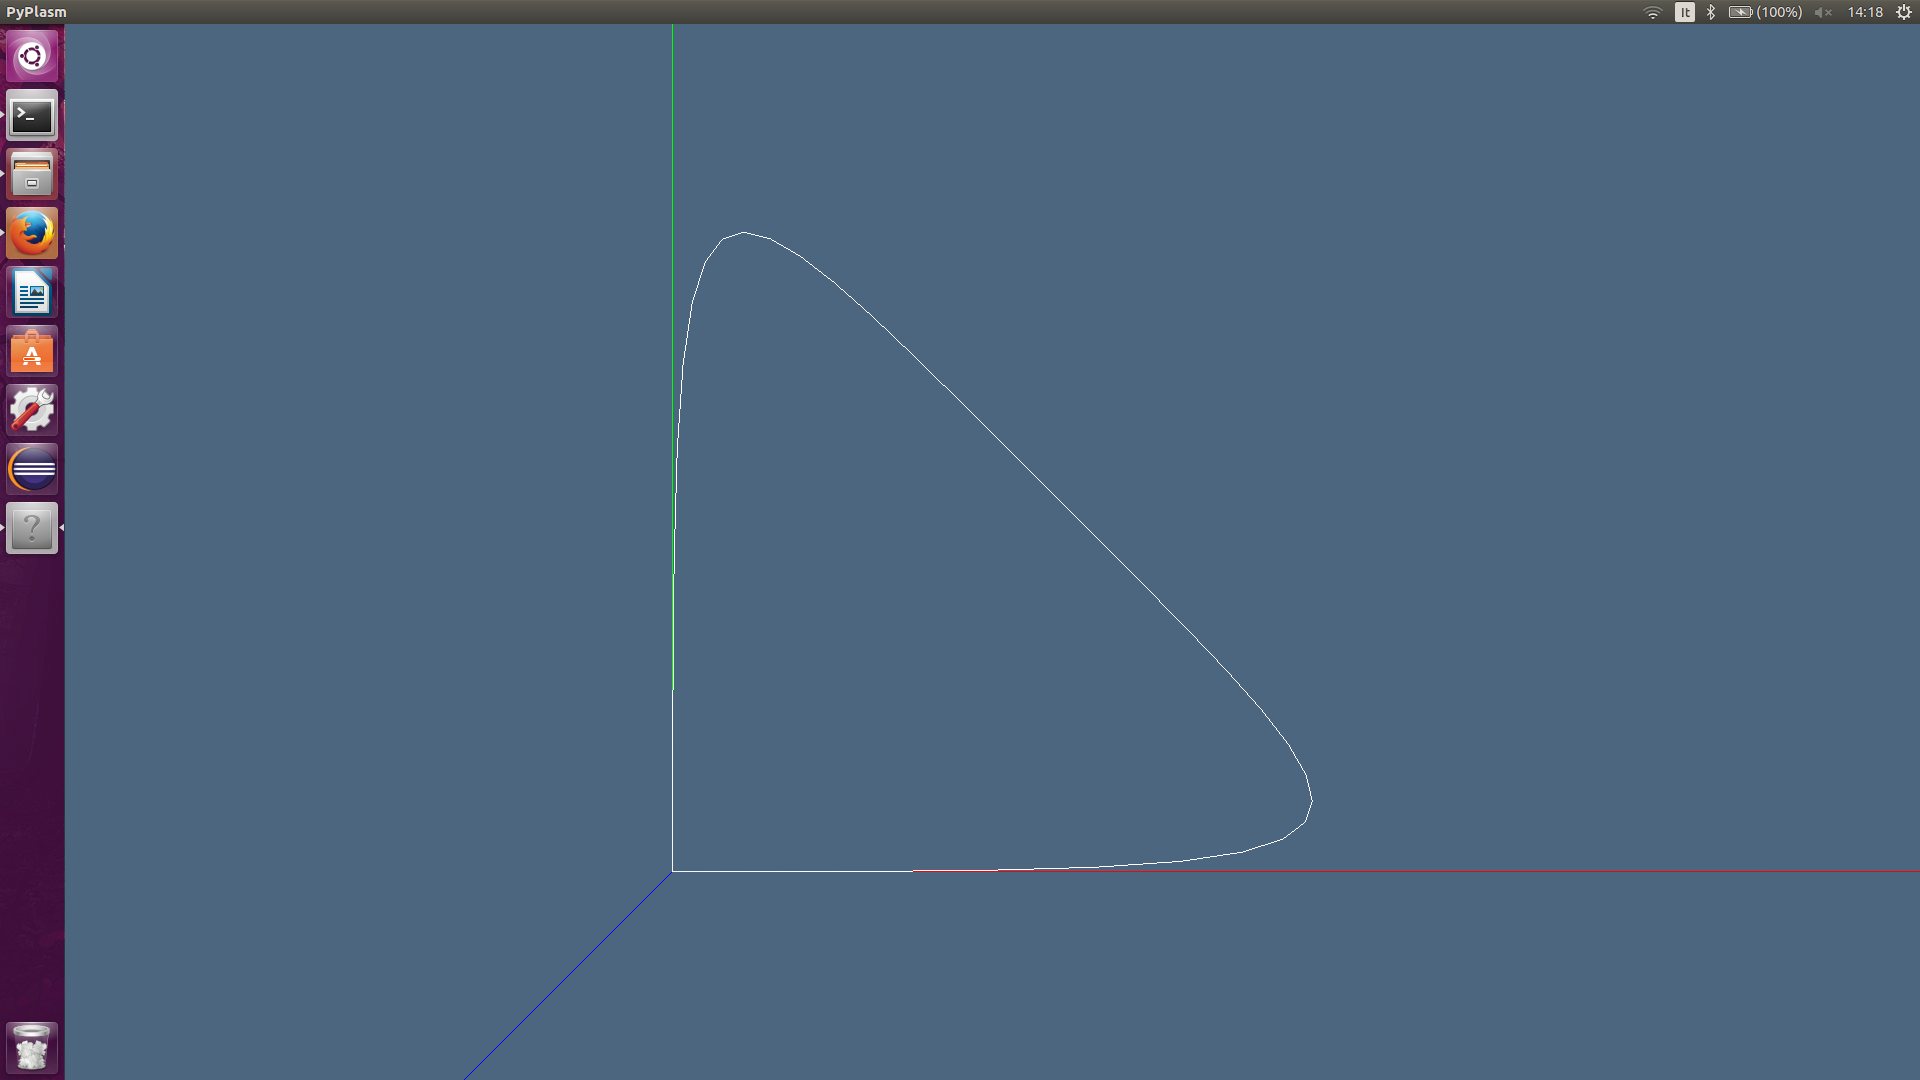

In [20]:
bz3=BEZIER(S1)([[0,0],[1,0],[-1,-1],[0,1],[0,0]])
bz4=BEZIER(S1)([[0,0],[1,0],[-2,-2],[0,1],[0,0]])
BZ=BEZIER(S2)([bz3,bz4])
dom = PROD([INTERVALS(1)(32), INTERVALS(1)(1)])
VIEW(MAP(BZ)(dom))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173b1245d0> >

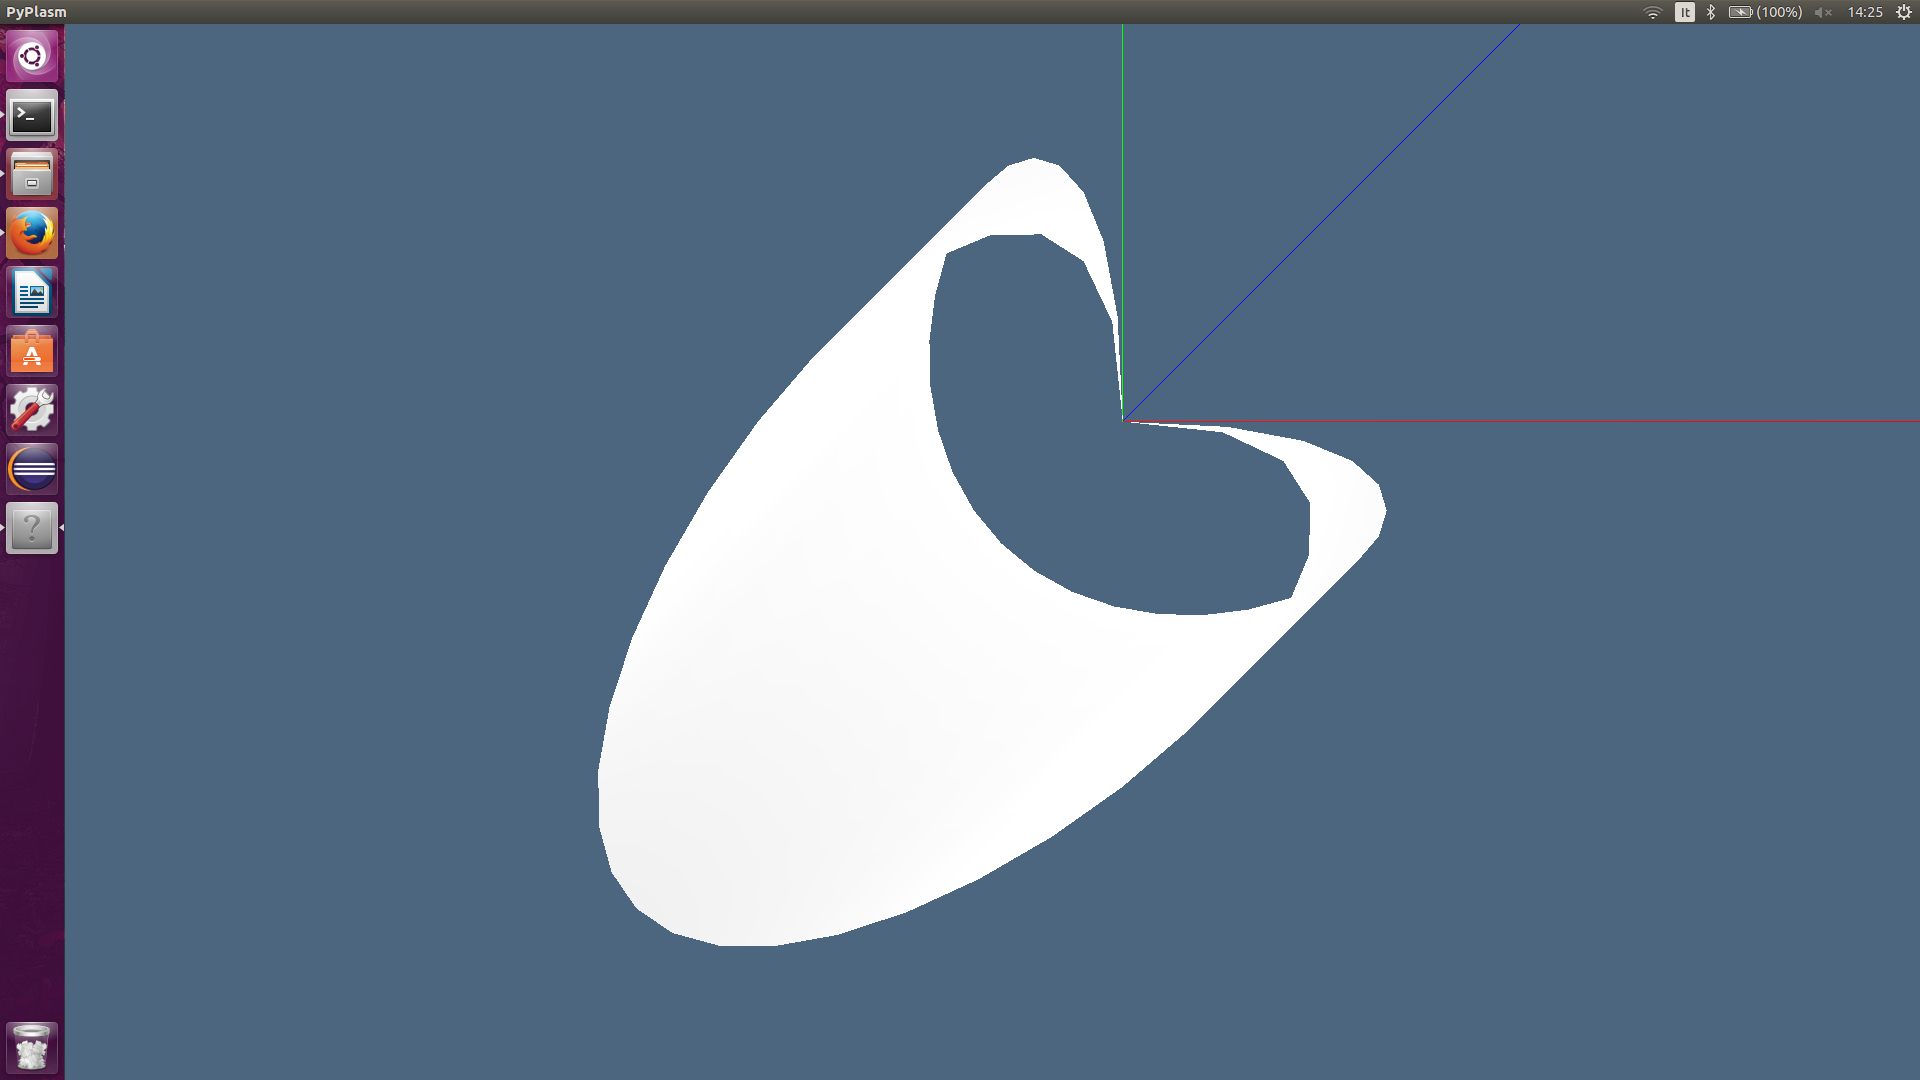

In [21]:
VIEW(SKEL_1(MAP(BZ)(dom)))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173b124a80> >

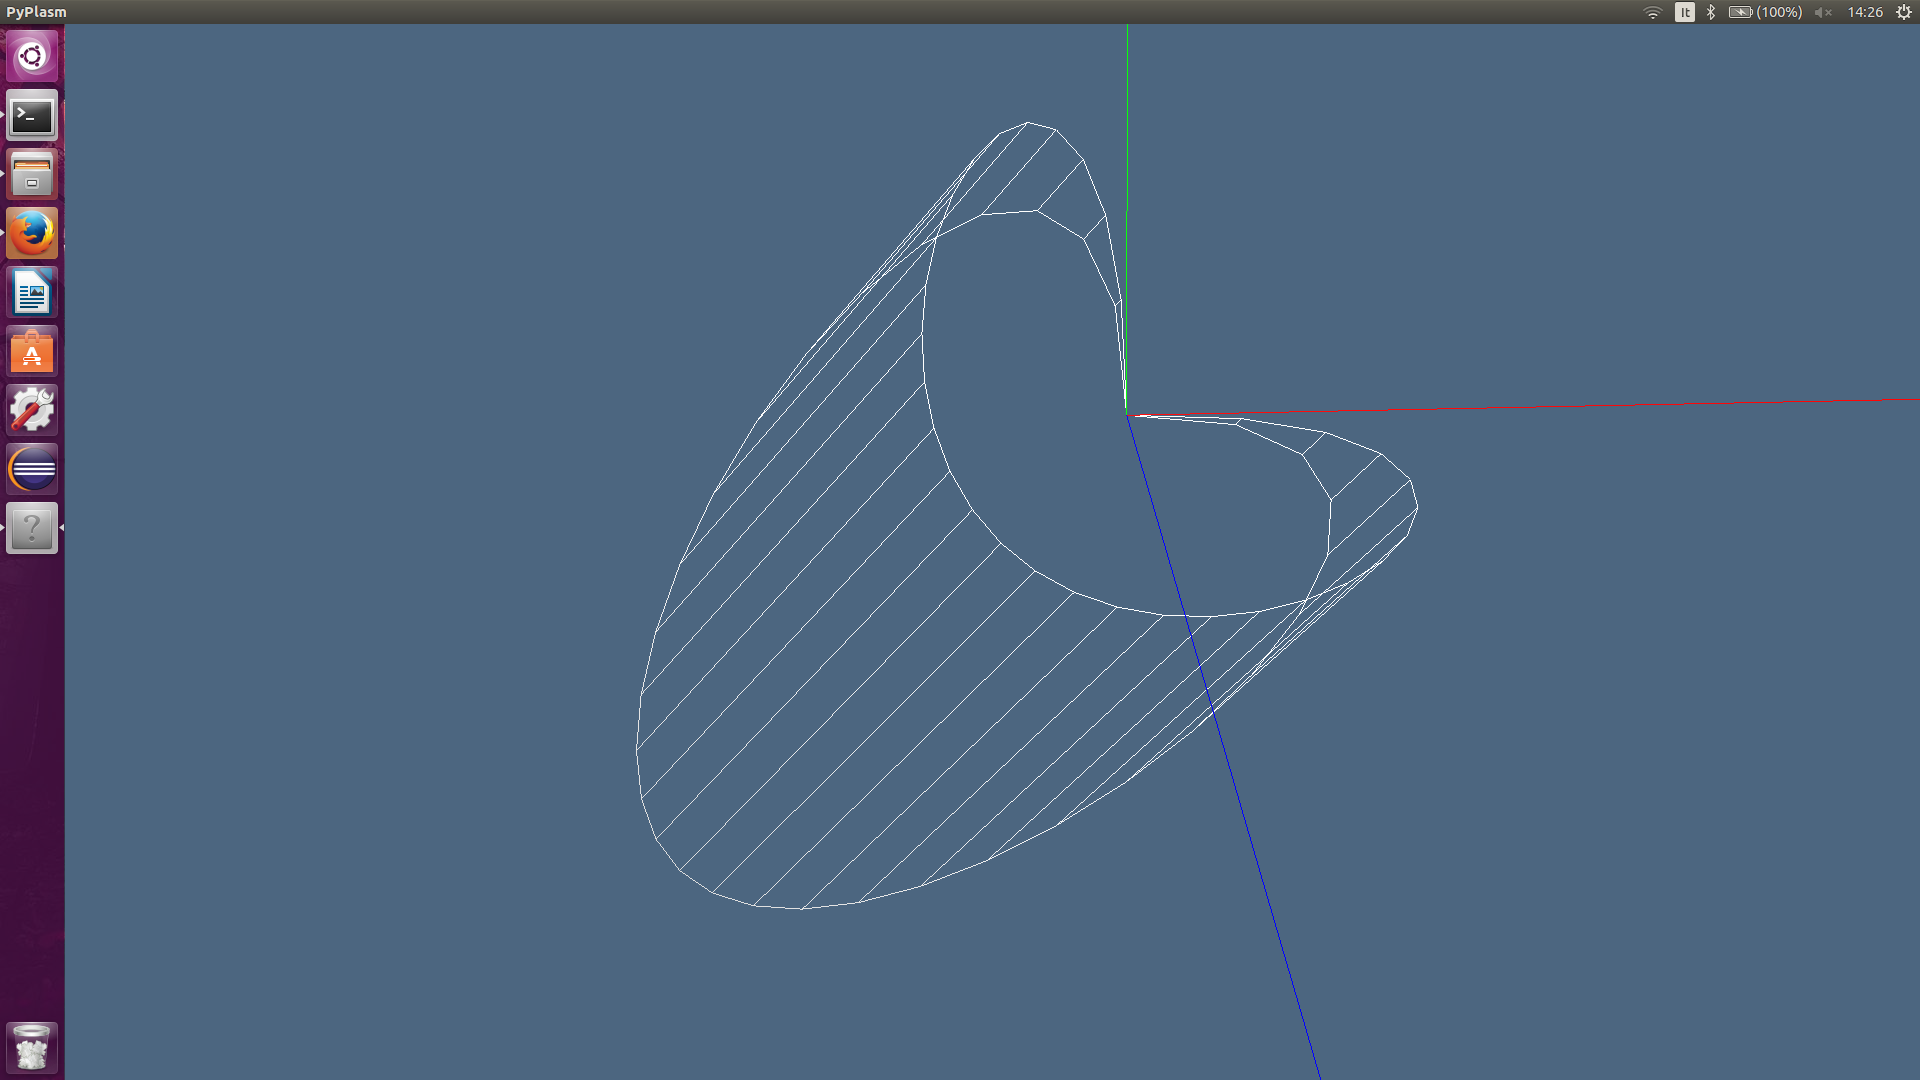

In [22]:
dom = PROD([INTERVALS(1)(32), INTERVALS(1)(4)])
VIEW(SKEL_1(MAP(BZ)(dom)))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173b124510> >

In [30]:
x = lambda (u,v): 1.5*cos(u)
y = lambda (u,v): 1.5*sin(u)
z = lambda p: 1
b = BEZIER(S1)([[1,.5,1],[1,1,2],[.5,1,3]])
bb = BEZIER(S2)([b,CONS([x,y,z])])
VIEW(SKEL_1(MAP(bb)(dom)))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173b11a210> >

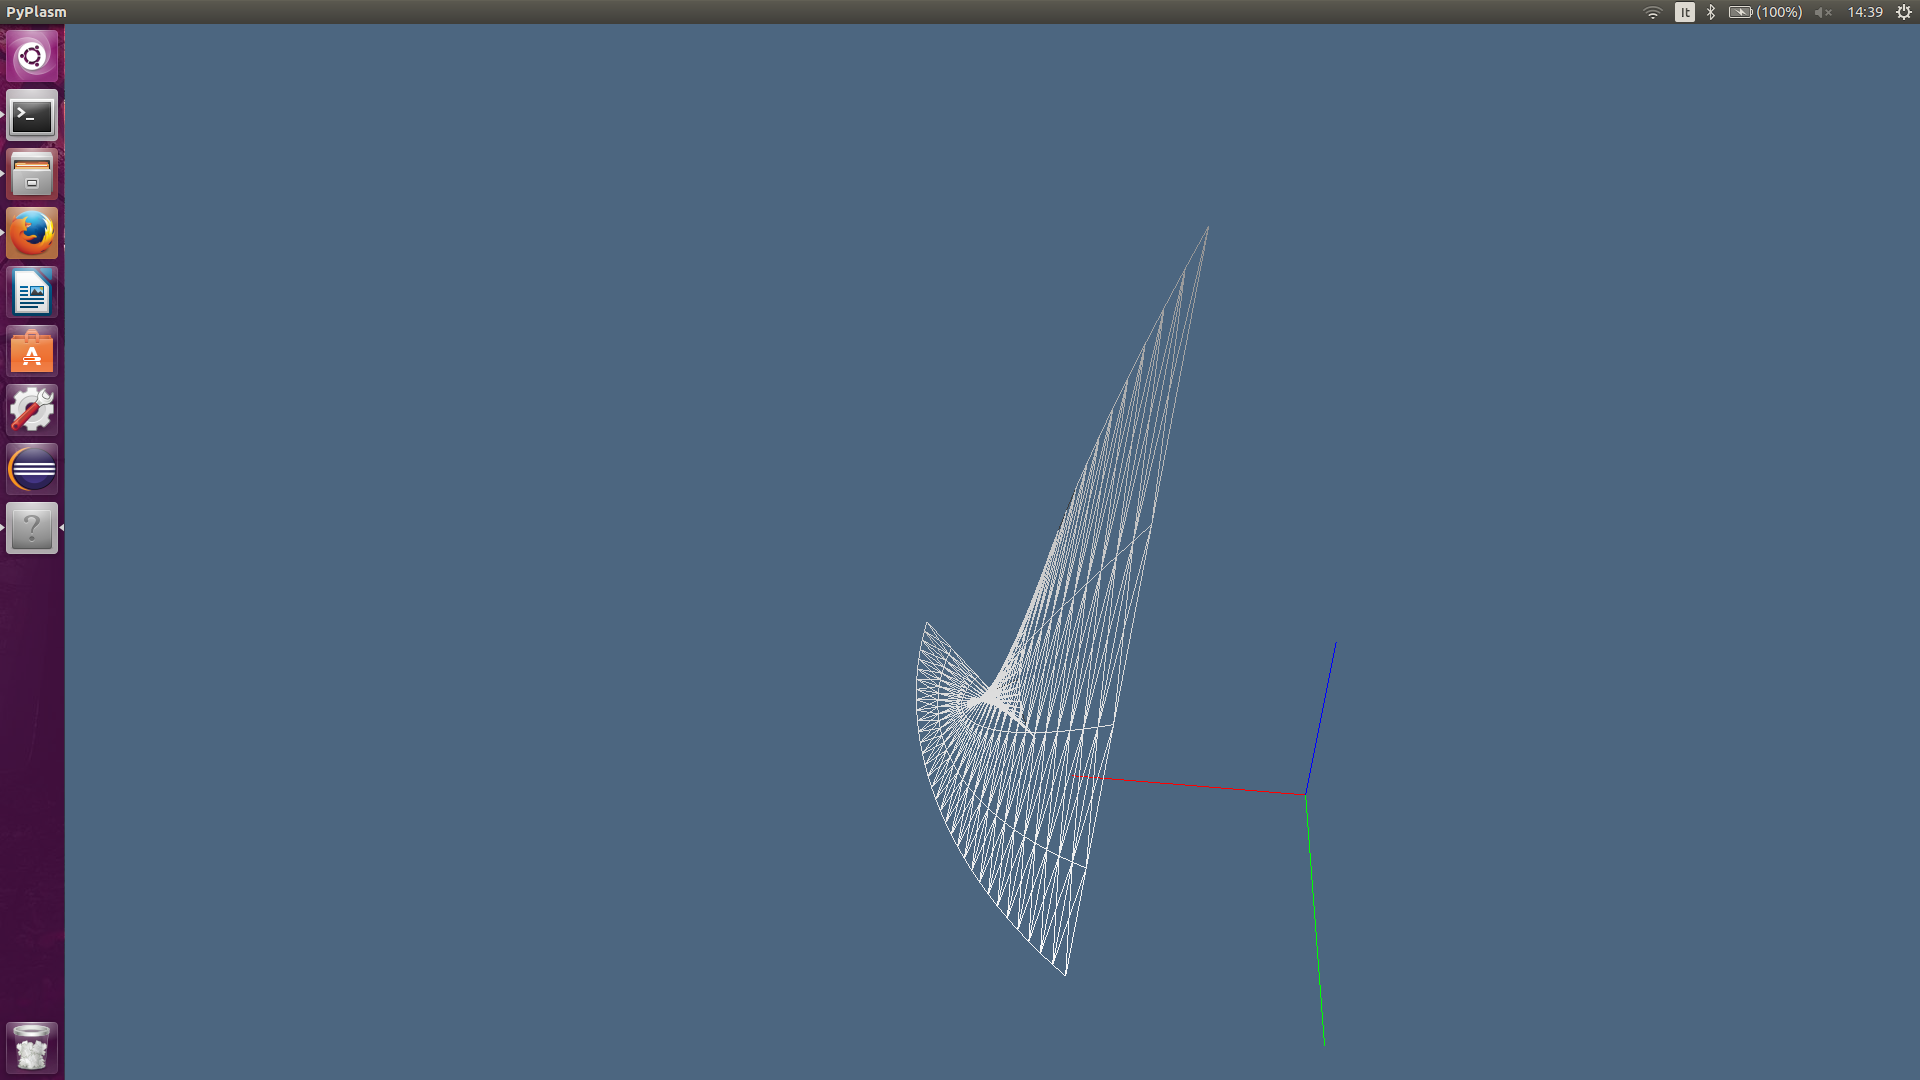

SPIRALE
--------

In [38]:
def spiralObject(args):
    R, h, n = args
    x = lambda (u,): R*cos(u)
    y = lambda (u,): R*sin(u)
    z = lambda (u,): h*u/(2*PI)
    dom = INTERVALS(n*2*PI)(36*n)
    return MAP(CONS([x,y,z]))(dom)

VIEW(spiralObject([2,1,4]))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173b0616c0> >

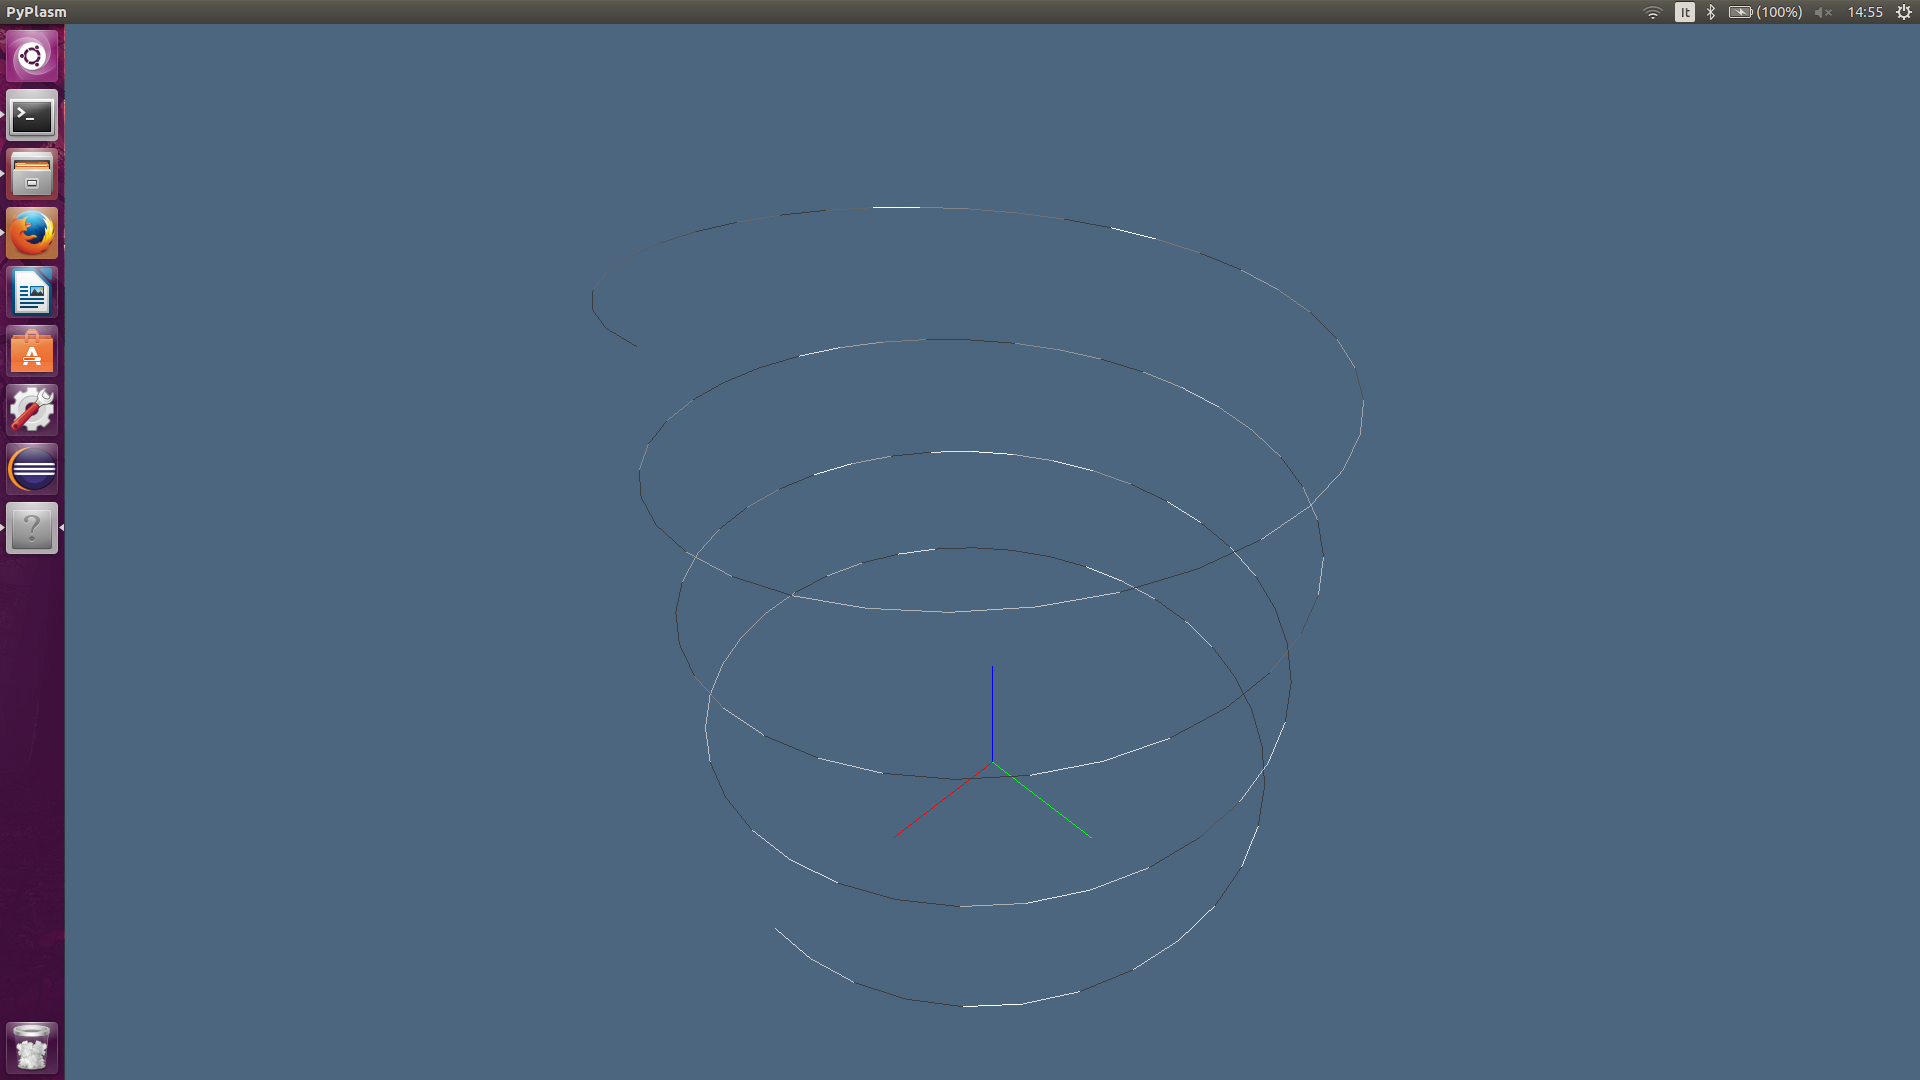

In [41]:
def spiral(args):
    R, h = args
    x = lambda (u,v): R*cos(u)
    y = lambda (u,v): R*sin(u)
    z = lambda (u,v): h*u/(2*PI)
    return CONS([x,y,z])

s1 = spiral([.5,.2])
s2 = spiral([1,.2])
sup = BEZIER(S2)([s1,s2])
dom = lambda n: PROD([INTERVALS(2*n*PI)(36*n),INTERVALS(1)(1)])
VIEW(MAP(sup)(dom(10)))
# Il dominio sono tetraedri. Per ottenere una resa perfetta il dominio dovrebbe essere suddiviso in triangoli in modo
# che tutti gli oggetti del dominio siano complanari.

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f173b0617b0> >

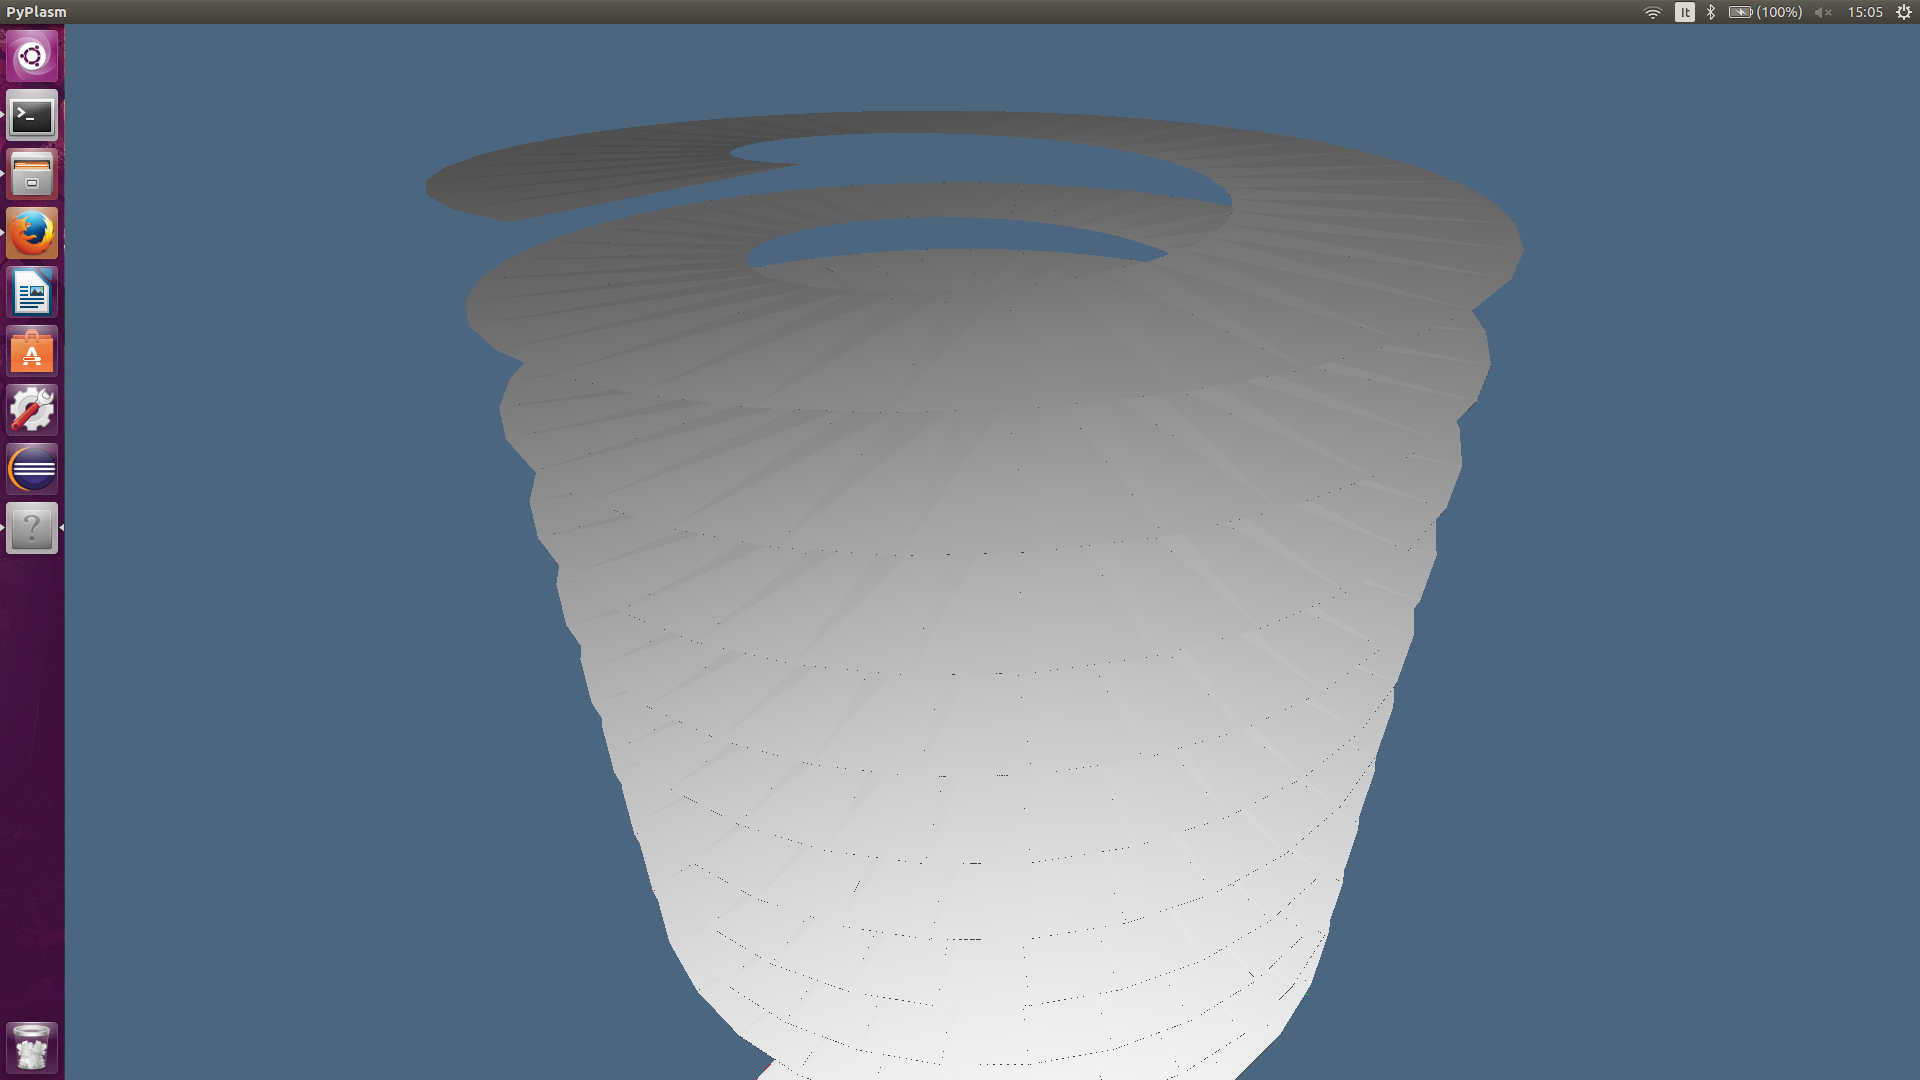